In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### 1. Insurance datasetda one-hot encoding va label-encoding qilish 

In [346]:
df = pd.read_csv('insurance.csv')
old_df = df
drop_outlier_df = df
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [347]:
df = pd.get_dummies(data = df, columns = ['sex'], prefix = 'gender', dtype = int)
df.head(10)

,age,bmi,children,smoker,region,charges,gender_female,gender_male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1
5,31,25.740,0,no,southeast,3756.62160,1,0
6,46,33.440,1,no,southeast,8240.58960,1,0
7,37,27.740,3,no,northwest,7281.50560,1,0
8,37,29.830,2,no,northeast,6406.41070,0,1
9,60,25.840,0,no,northwest,28923.13692,1,0


### One-hot encodingdan foydalanib jins ustunini mashina tushunishiga oson bo'lgan 0, 1 qiymatlarga aylantirib oldim

In [348]:
df = pd.get_dummies(data = df, columns = ['smoker'], dtype = int)
df.head(10)

,age,bmi,children,region,charges,gender_female,gender_male,smoker_no,smoker_yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0
5,31,25.740,0,southeast,3756.62160,1,0,1,0
6,46,33.440,1,southeast,8240.58960,1,0,1,0
7,37,27.740,3,northwest,7281.50560,1,0,1,0
8,37,29.830,2,northeast,6406.41070,0,1,1,0
9,60,25.840,0,northwest,28923.13692,1,0,1,0


### Yana bir ustun smoker ustuni ya'ni chekish chekmasligini aniqlovchi ustunni ham one-hot encoding bilan mashina tushunishi oson bo'lgan 0,1 larga o'girib oldim

## One-hot encodingning afzalliklari 
#### 1. Kategorik obyektlarning barcha qiymatlarini saqlab qoladi
#### 2. Linear modellar uchun jua ham mos ekan

## One-hot encodingning salbiy jihatlari
#### 1. Ustunlarni ko'paytirib yuboradi
#### 2. Encoding qilish jarayonida yangi ma'lumotlar qo'shmaydi
#### 3. Juda ham ko'p dummy (yasama) o'zgaruvchilar bir xil bo'lishi mumkin va bu ma'lumot yo'qolishiga olib kelishi mumkin 

## Label encoding

In [349]:
df = pd.get_dummies(data = df, columns = ['region'], dtype = int)
df.head(10)

,age,bmi,children,charges,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


In [350]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
old_df['region_label_encode'] = label_encoder.fit_transform(old_df['region'])
old_df

,age,sex,bmi,children,smoker,region,charges,region_label_encode
0,19,female,27.900,0,yes,southwest,16884.92400,3
1,18,male,33.770,1,no,southeast,1725.55230,2
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,2
1336,21,female,25.800,0,no,southwest,2007.94500,3


#### Region ustunida 4ta qiymat bor edi va ularni label encoding orqali yangi ustun ochib numeric holatda transform qilib oldim

## Label encodingning afzalliklari
#### 1. Bajarish uchun oson
#### 2. Ustunlarni ko'paytirib yubormaydi
#### 3. Daraxt algaritmlari bilan ishlash uchun qulay

## Label encoding salbiy jihatlari
### Encoding jarayonida qo'shimcha ma'lumotlar qo'shmaydi
### Lineir modellar uchun qulay emas
### Test to'plamida yangi kategoriyalarni avtomatik ravishda boshqarmaydi

## Insurance datasetda outlier'larni 3 ta uslubda chiqarib tashlash

### IQR bilan outlierlarni tashlab yuborish

##### Boxplot bilan visualizatsiyasini ko'ramiz

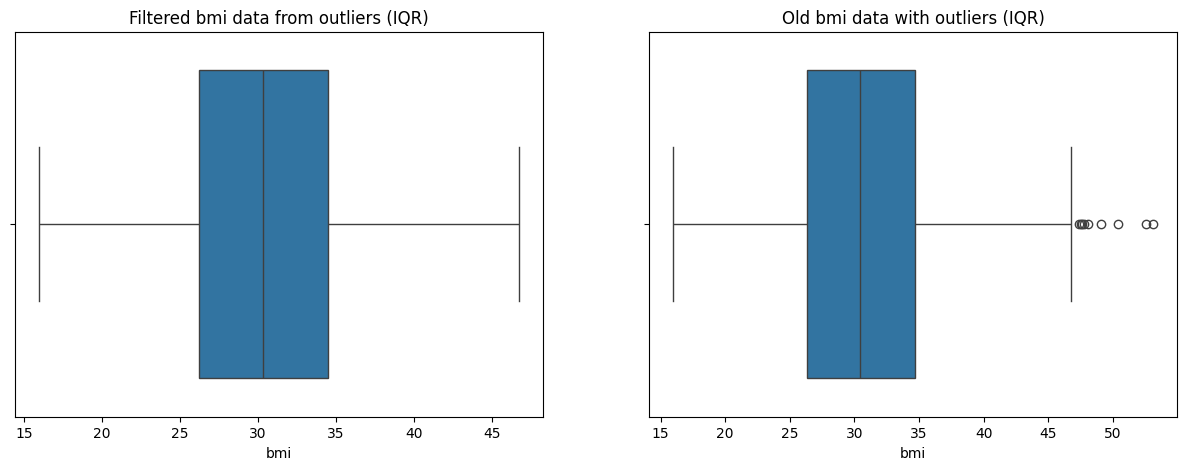

In [351]:
bmi = drop_outlier_df['bmi']
Q1 = bmi.quantile(0.25)
Q3 = bmi.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
new_bmi = drop_outlier_df[(drop_outlier_df['bmi'] > lower_bound) & (drop_outlier_df['bmi'] < upper_bound)]
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.boxplot(data = new_bmi, x = 'bmi', ax = ax0).set(title = 'Filtered bmi data from outliers (IQR)')
sns.boxplot(data=drop_outlier_df, x='bmi', ax = ax1).set(title = 'Old bmi data with outliers (IQR)')
plt.show()

##### Distogramma bilan visualizatsiyasini ko'ramiz

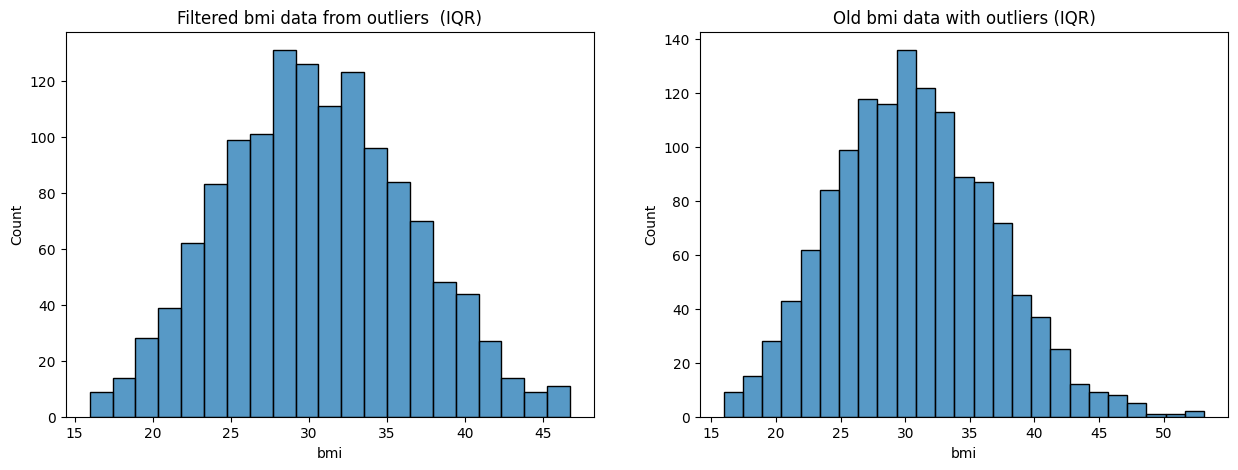

In [352]:
bmi = drop_outlier_df['bmi']
Q1 = bmi.quantile(0.25)
Q3 = bmi.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
new_bmi = drop_outlier_df[(drop_outlier_df['bmi'] > lower_bound) & (drop_outlier_df['bmi'] < upper_bound)]
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.histplot(data = new_bmi, x = 'bmi', ax = ax0).set(title = 'Filtered bmi data from outliers  (IQR)')
sns.histplot(data=drop_outlier_df, x='bmi', ax = ax1).set(title = 'Old bmi data with outliers (IQR)')
plt.show()

### IQR uslubidan foydalanib outlierlarni tashlab yubordim

### Gaussian distribution (mean and std)

##### Boxplot bilan visualizatsiyasini ko'ramiz

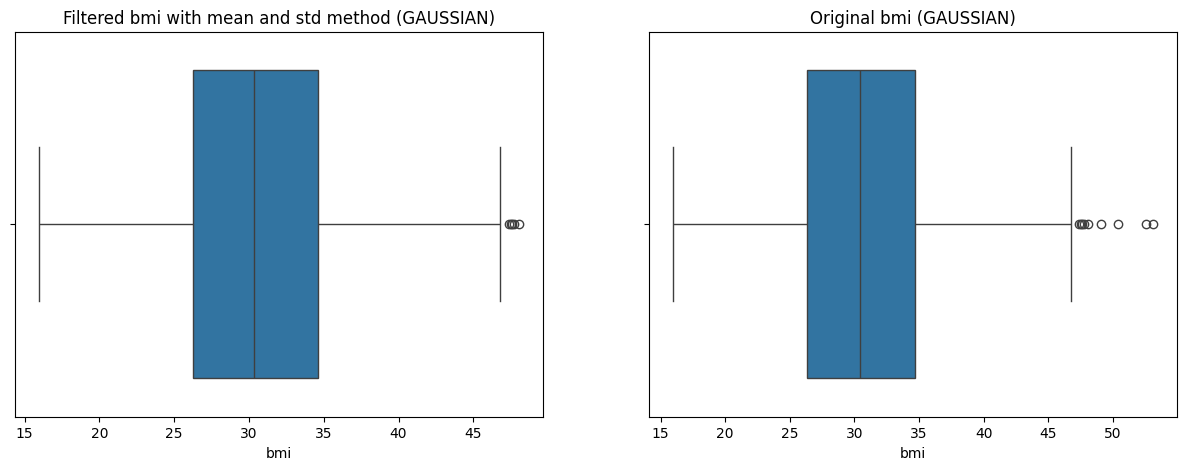

In [353]:
bmi = drop_outlier_df['bmi']
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
upper_limit = bmi.mean() + bmi.std() * 3
lower_limit = bmi.mean() - bmi.std() * 3
gaussian_df = drop_outlier_df[(drop_outlier_df['bmi'] >= lower_limit) & (drop_outlier_df['bmi'] <= upper_limit)]
sns.boxplot(data = gaussian_df, x = 'bmi', ax = ax0).set(title = 'Filtered bmi with mean and std method (GAUSSIAN)')
sns.boxplot(data = drop_outlier_df, x = 'bmi', ax = ax1).set(title = 'Original bmi (GAUSSIAN)')
plt.show()

##### Distogramma bilan visualizatsiyani ko'ramiz

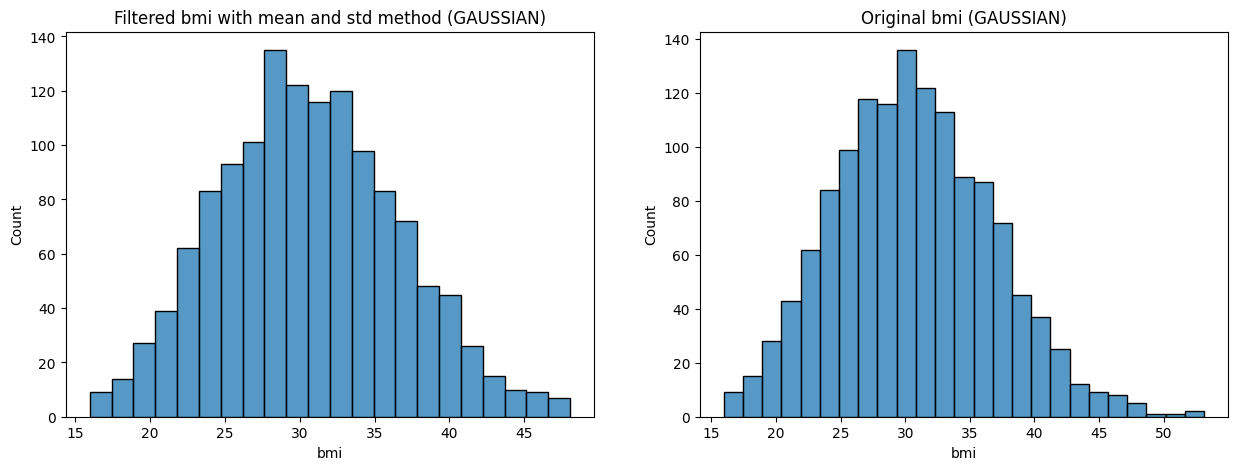

In [354]:
bmi = drop_outlier_df['bmi']
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
upper_limit = bmi.mean() + bmi.std() * 3
lower_limit = bmi.mean() - bmi.std() * 3
gaussian_df = drop_outlier_df[(drop_outlier_df['bmi'] >= lower_limit) & (drop_outlier_df['bmi'] <= upper_limit)]
sns.histplot(data = gaussian_df, x = 'bmi', ax = ax0).set(title = 'Filtered bmi with mean and std method (GAUSSIAN)')
sns.histplot(data = drop_outlier_df, x = 'bmi', ax = ax1).set(title = 'Original bmi (GAUSSIAN)')
plt.show()

### O'rtacha qiymat va standart og'ishga asoslangan outlier detectorlari odatda o'rtacha qiymatdan juda ham uzoqda yotgan outlierlarni tashlab yuboradi IQRga asoslanganlaridan farqli ravishda. Natija ham xuddi shunday ya'ni o'rta qiymatdan juda uzoqda yotgan outlierlar tashlab yuborildi

### Quantiles

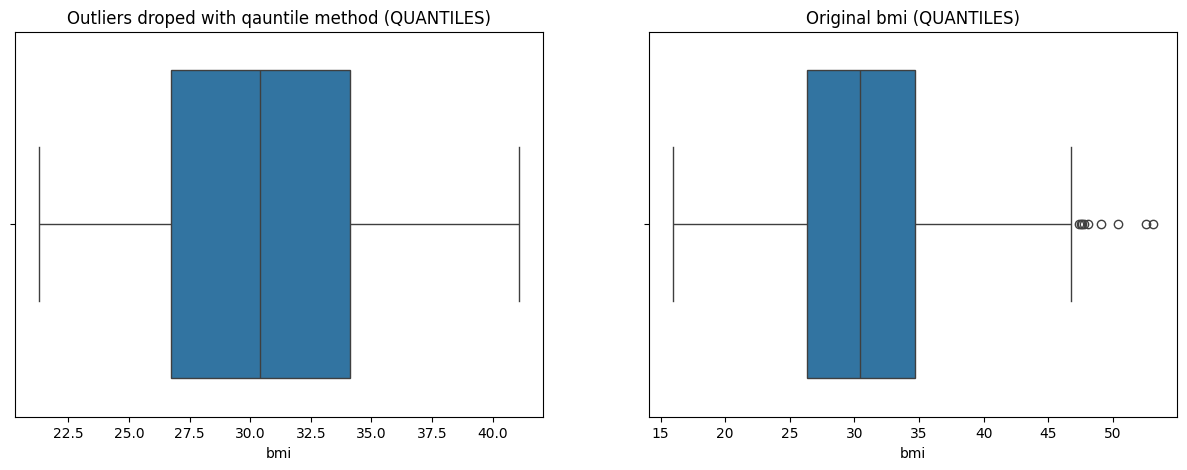

In [355]:
bmi = drop_outlier_df['bmi']
lower_quantile = bmi.quantile(0.05)
upper_quantile = bmi.quantile(0.95)

quantile_method = drop_outlier_df[(drop_outlier_df['bmi'] >= lower_quantile) & (drop_outlier_df['bmi'] <= upper_quantile)]
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.boxplot(data = quantile_method, x = 'bmi', ax = ax0).set(title = 'Outliers droped with qauntile method (QUANTILES)')
sns.boxplot(data = drop_outlier_df, x = 'bmi', ax = ax1).set(title = 'Original bmi (QUANTILES)')
plt.show()

##### Distogramma bilan

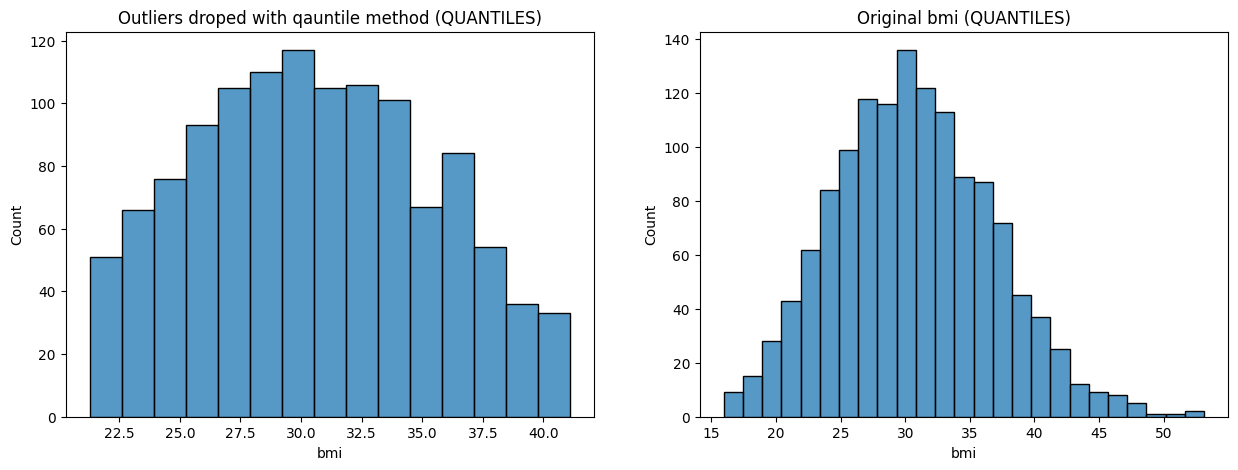

In [356]:
bmi = drop_outlier_df['bmi']
lower_quantile = bmi.quantile(0.05)
upper_quantile = bmi.quantile(0.95)

quantile_method = drop_outlier_df[(drop_outlier_df['bmi'] >= lower_quantile) & (drop_outlier_df['bmi'] <= upper_quantile)]
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.histplot(data = quantile_method, x = 'bmi', ax = ax0).set(title = 'Outliers droped with qauntile method (QUANTILES)')
sns.histplot(data = drop_outlier_df, x = 'bmi', ax = ax1).set(title = 'Original bmi (QUANTILES)')
plt.show()

### Quantile methodidan foydalanib outlierlarni tashlab yubordim

## Insurance datasetda outlier'larni 3 ta uslubda upper_limit, lower_limit ga outlier'larni tenglashtirish

### Gaussian distribution (mean and std)

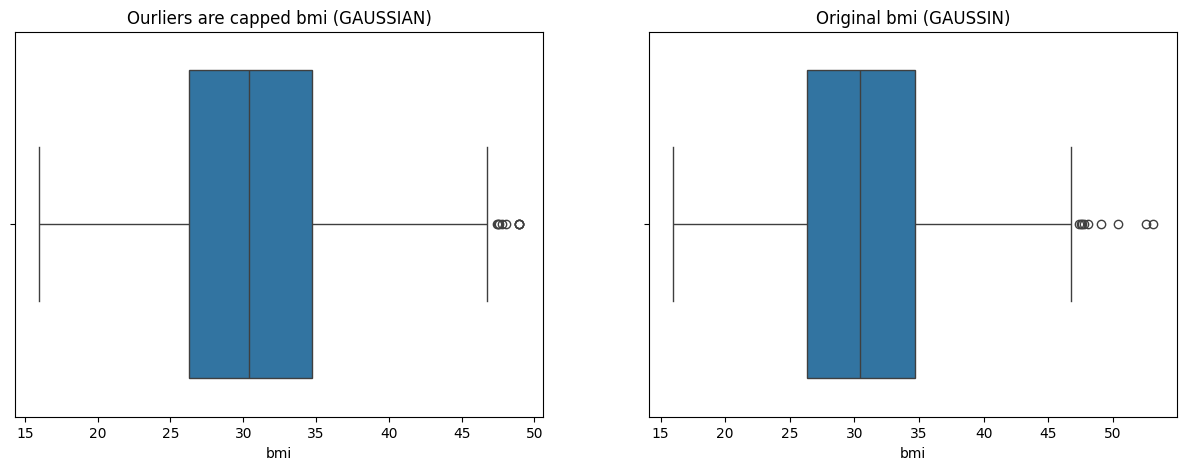

In [357]:
bmi = drop_outlier_df['bmi']
upper_limit_equal = bmi.mean() + bmi.std() * 3
lower_limit_equal = bmi.mean() - bmi.std() * 3

df['bmi'] = df['bmi'].apply(lambda x: lower_limit_equal if x < lower_limit_equal else upper_limit_equal if x > upper_limit_equal else x)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])
sns.boxplot(data=df, x='bmi', ax=ax0).set(title = 'Ourliers are capped bmi (GAUSSIAN)')
sns.boxplot(x=bmi, ax=ax1).set(title = 'Original bmi (GAUSSIN)')
plt.show()


##### Distogramma bilan visualizatsiya

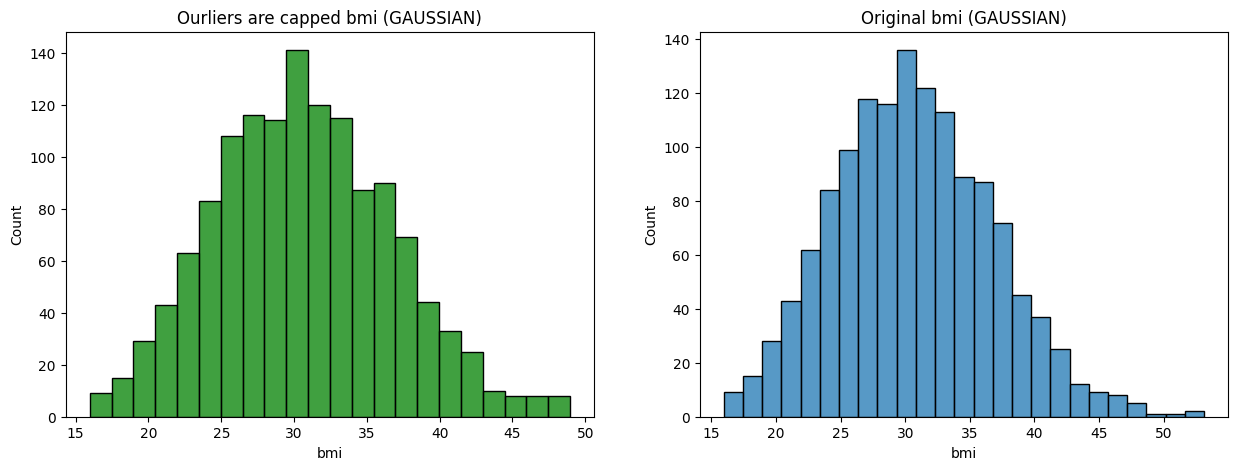

In [358]:
bmi = drop_outlier_df['bmi']
upper_limit_equal = bmi.mean() + bmi.std() * 3
lower_limit_equal = bmi.mean() - bmi.std() * 3

df['bmi'] = df['bmi'].apply(lambda x: lower_limit_equal if x < lower_limit_equal else upper_limit_equal if x > upper_limit_equal else x)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])
sns.histplot(data=df, x='bmi', ax=ax0, color = 'g').set(title = 'Ourliers are capped bmi (GAUSSIAN)')
sns.histplot(x=bmi, ax=ax1).set(title = 'Original bmi (GAUSSIAN)')
plt.show()


#### Gaus usulida outlierlarni upper_limit va lower limitga tenglab oldim, natijada o'rta qiymatdan juda ham uzoqdagi outlierlar kesib tashlandi.

C:\Users\User\AppData\Local\Temp\ipykernel_12268\1682353448.py:5: FutureWarning: using <function <lambda> at 0x000001E4941B5800> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df['bmi'] = df['bmi'].agg(lambda x: lower_quantile_eq if x < lower_quantile_eq else upper_quantile_eq if x > upper_quantile_eq else x)


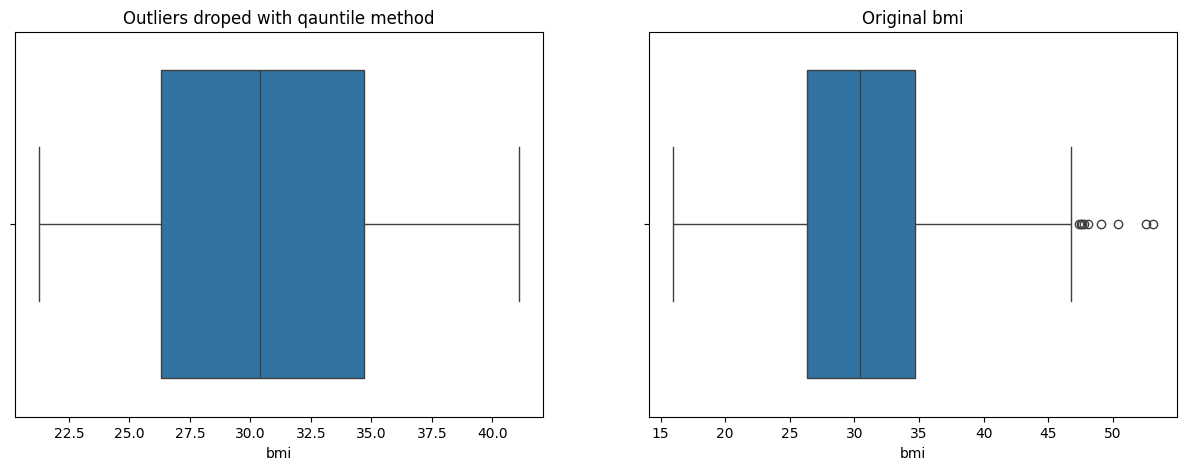

In [359]:
bmi = drop_outlier_df['bmi']
lower_quantile_eq = bmi.quantile(0.05)
upper_quantile_eq = bmi.quantile(0.95)

df['bmi'] = df['bmi'].agg(lambda x: lower_quantile_eq if x < lower_quantile_eq else upper_quantile_eq if x > upper_quantile_eq else x)

fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.boxplot(data = df, x = 'bmi', ax = ax0).set(title = 'Outliers droped with qauntile method')
sns.boxplot(x = bmi, ax = ax1).set(title = 'Original bmi')
plt.show()

##### Distogramma bilan ham koramiz

C:\Users\User\AppData\Local\Temp\ipykernel_12268\479307130.py:5: FutureWarning: using <function <lambda> at 0x000001E49468E660> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df['bmi'] = df['bmi'].agg(lambda x: lower_quantile_eq if x < lower_quantile_eq else upper_quantile_eq if x > upper_quantile_eq else x)


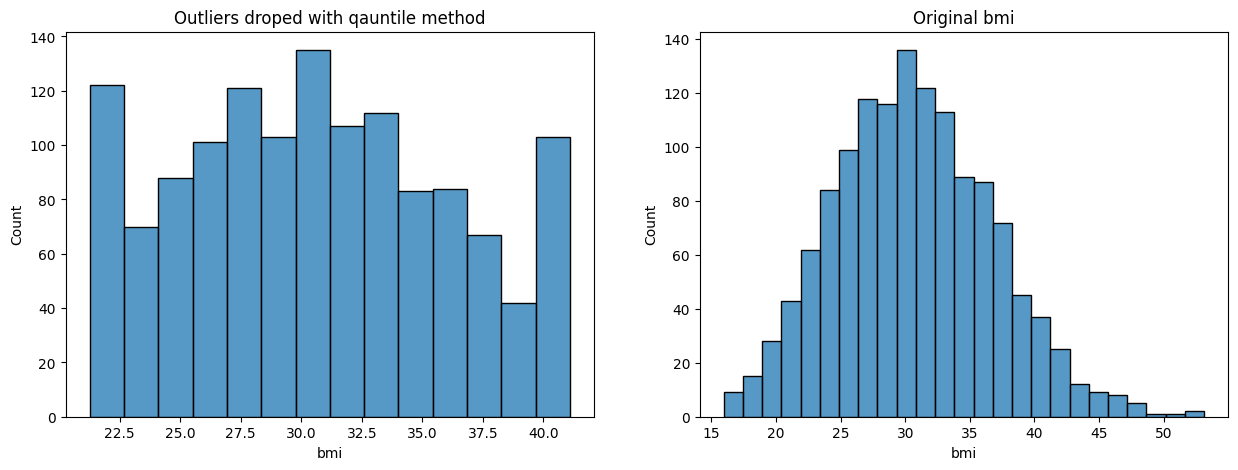

In [360]:
bmi = drop_outlier_df['bmi']
lower_quantile_eq = bmi.quantile(0.05)
upper_quantile_eq = bmi.quantile(0.95)

df['bmi'] = df['bmi'].agg(lambda x: lower_quantile_eq if x < lower_quantile_eq else upper_quantile_eq if x > upper_quantile_eq else x)

fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 5])
sns.histplot(data = df, x = 'bmi', ax = ax0).set(title = 'Outliers droped with qauntile method')
sns.histplot(x = bmi, ax = ax1).set(title = 'Original bmi')
plt.show()

In [361]:
bmi.describe() # - natijalarni tekshirib bordim

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

### Winsorizing usulida outlierlar kesib tashlandi, natijadan ko'rishimiz mumkini hech qanday outlierlar qolmadi

C:\Users\User\AppData\Local\Temp\ipykernel_12268\3031853877.py:7: FutureWarning: using <function <lambda> at 0x000001E49468E2A0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  drop_outlier_df['bmi'] = drop_outlier_df['bmi'].agg(lambda x: lower_bound_eq if x < lower_bound_eq else upper_bound_eq if x > upper_bound_eq else x)


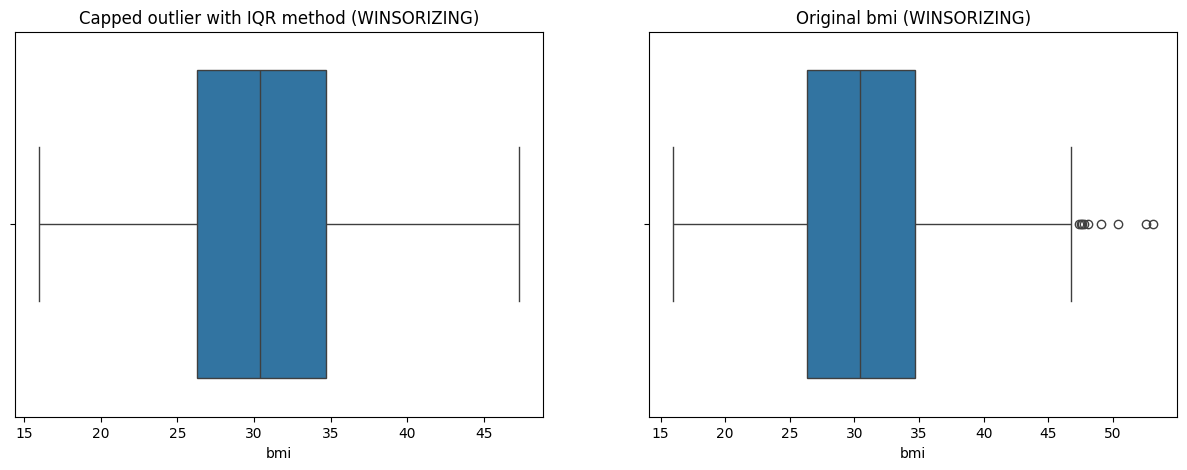

In [362]:
bmi = drop_outlier_df['bmi']
Q1 = bmi.quantile(0.25)
Q3 = bmi.quantile(0.75)
IQR = Q3 - Q1
lower_bound_eq = Q1 - 1.5 * IQR
upper_bound_eq = Q3 + 1.5 * IQR
drop_outlier_df['bmi'] = drop_outlier_df['bmi'].agg(lambda x: lower_bound_eq if x < lower_bound_eq else upper_bound_eq if x > upper_bound_eq else x)
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = [15, 5])
sns.boxplot(data = drop_outlier_df, x = 'bmi', ax = ax0).set(title = 'Capped outlier with IQR method (WINSORIZING)')
sns.boxplot(x = bmi, ax = ax1).set(title = 'Original bmi (WINSORIZING)')
plt.show()

##### Distogramma bilan ham chiqaramiz

C:\Users\User\AppData\Local\Temp\ipykernel_12268\1786854905.py:7: FutureWarning: using <function <lambda> at 0x000001E494F1F560> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  drop_outlier_df['bmi'] = drop_outlier_df['bmi'].agg(lambda x: lower_bound_eq if x < lower_bound_eq else upper_bound_eq if x > upper_bound_eq else x)


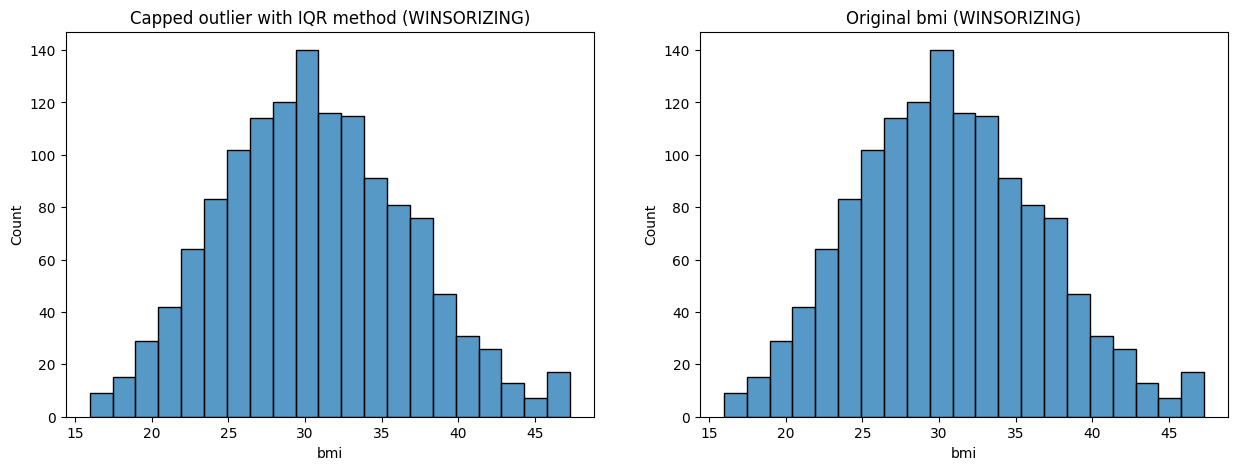

In [363]:
bmi = drop_outlier_df['bmi']
Q1 = bmi.quantile(0.25)
Q3 = bmi.quantile(0.75)
IQR = Q3 - Q1
lower_bound_eq = Q1 - 1.5 * IQR
upper_bound_eq = Q3 + 1.5 * IQR
drop_outlier_df['bmi'] = drop_outlier_df['bmi'].agg(lambda x: lower_bound_eq if x < lower_bound_eq else upper_bound_eq if x > upper_bound_eq else x)
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = [15, 5])
sns.histplot(data = drop_outlier_df, x = 'bmi', ax = ax0).set(title = 'Capped outlier with IQR method (WINSORIZING)')
sns.histplot(x = bmi, ax = ax1).set(title = 'Original bmi (WINSORIZING)')
plt.show()

### IQRdan foyalanib outlierlarni cap qilib oldim, natijada hech qanday outlierlar qolmadi, bu juda ham ko'p outlierlar bilan ishlagandan samarali usul ekan